### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Friday, Mar 5th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

1.

In [2]:
# filepath to dataset
filepath = '../../homeworks/hw_data/hw4_data_1.npy'

# reading in dataset
data = np.load(filepath)
volt = data[:,0]
unc  = data[:,1]

w = np.power(unc, -2)
samp_mean = np.sum(volt*w)/np.sum(w)
std_error = np.power(np.sum(w), -0.5) # std error on sample mean

print(f'Sample mean = {samp_mean:.5f}')
print(f'Std error on sample mean = {std_error:.5f}')

Sample mean = 4.94212
Std error on sample mean = 0.43024


2. 

In [3]:
from scipy import optimize

# defining a function to calculate chi^2 for given parameters
def chi2(mu, x, sigma):
    return np.sum(((x-mu)/sigma)**2)

# defining a lambda function to loop through proposed mus
f_squared = lambda beta: chi2(beta, volt, unc)

# optimize mu - minimise chi2
beta0 = 5
mu_bf = optimize.fmin(f_squared, beta0)[0]
print(f'Best fit mean voltage = {mu_bf:.5f}')

Optimization terminated successfully.
         Current function value: 5.614502
         Iterations: 13
         Function evaluations: 26
Best fit mean voltage = 4.94214


3. 

In [6]:
from scipy.stats import norm

# defining of grid of potential means
gs = 10000 # mugrid size
mugrid = np.linspace(0, 10, gs)
dx = 10/gs

# defining a uniform prior mu between 3 and 7
prior = np.ones(gs)/(7-3)
prior[mugrid < 3] = 0
prior[mugrid > 7] = 0

# likelihood at each mu given volt, uncertainty
# assuming gaussian likelihood
L = np.array([np.prod(norm(loc=volt, scale=unc).pdf(mu))
                  for mu in mugrid])

In [7]:
# calculating posterior
posterior = L * prior

# normalising posterior by
# calculating area using trapezoid rule
post_area = np.trapz(posterior, mugrid, dx)
post_normal = posterior/post_area

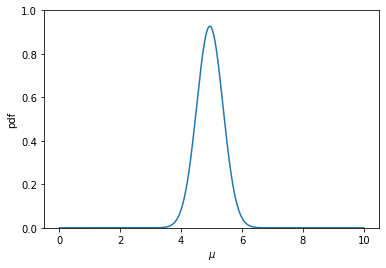

In [10]:
plt.plot(mugrid, post_normal)
plt.ylim(0,1)
plt.xlabel(r'$\mu$')
plt.ylabel('pdf');

SRT: All correct. Removing a point due to the prior function-- it would generalize better and be more efficient if it were a scipy.stats uniform instance. -1

4.

In [12]:
# calculating MAP for posterior
map_idx = np.argmax(posterior)
MAP = mugrid[map_idx]

# calculating 68.3% credible region
X = (1-68.3/100)/2
post_cumulative = np.cumsum(post_normal)*dx
ltail = post_cumulative[post_cumulative < X] # lower tail
utail = post_cumulative[post_cumulative > 1-X] # upper tail
lb = mugrid[len(ltail)] # using length of ltail as required idx
ub = mugrid[1 - len(utail)] # using length of utail as required idx
    
print(f'MAP = {MAP:.5f}')
print(f'68% credible region is {lb:.5f} < mu < {ub:.5f}')
print(f'Sample mean +/- std error = {samp_mean-std_error:.5f} < mu < {samp_mean+std_error:.5f}')

MAP = 4.94249
68% credible region is 4.51145 < mu < 5.37354
Sample mean +/- std error = 4.51187 < mu < 5.37236


Both the upper and lower boundaries of $\bar{x}\pm\sigma_\bar{x}$ are within the 68% credible region

5. 

MAP = 4.94249
68% credible region is 4.73547 < mu < 5.23952
Sample mean +/- std error = 4.51187 < mu < 5.37236


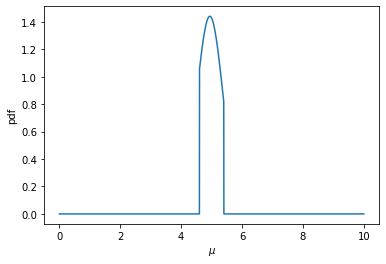

In [14]:
# calculating prior prop
prior2 = np.ones(gs)/(5.4-4.6)
prior2[mugrid<4.6] = 0
prior2[mugrid>5.4] = 0

# calculating posterior (same L)
posterior2 = L * prior2

# normalising posterior (trap rule)
post_area2 = np.trapz(posterior2, mugrid, dx)
post_normal2 = posterior2/post_area2

plt.plot(mugrid, post_normal2)
#plt.ylim(0,1)
plt.xlabel(r'$\mu$')
plt.ylabel('pdf');

# calculating MAP for posterior
map_idx = np.argmax(posterior2)
MAP = mugrid[map_idx]

# calculating 68.3% credible region
X = (1-68.3/100)/2
post_cumulative = np.cumsum(post_normal2)*dx
ltail = post_cumulative[post_cumulative < X] # lower tail
utail = post_cumulative[post_cumulative > 1-X] # upper tail
lb = mugrid[len(ltail)] # using length of ltail as required idx
ub = mugrid[1 - len(utail)] # using length of utail as required idx
    
print(f'MAP = {MAP:.5f}')
print(f'68% credible region is {lb:.5f} < mu < {ub:.5f}')
print(f'Sample mean +/- std error = {samp_mean-std_error:.5f} < mu < {samp_mean+std_error:.5f}')

Neither the upper and lower boundaries of $\bar{x}\pm\sigma_\bar{x}$ are within the 68% credible region

6.

MAP = 5.65357
68% credible region is 5.40754 < mu < 5.90159
Sample mean +/- std error = 4.51187 < mu < 5.37236
Neither the upper or lower bounds of the sample is within the credible region


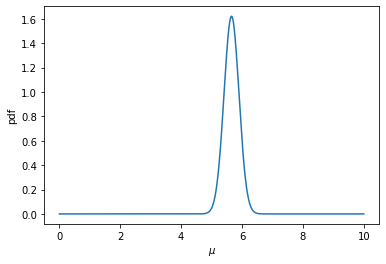

In [15]:
# creating a gaussian object
mu = 6
sigma = 0.3
priorN = norm(mu, sigma).pdf(mugrid)

# calculating posterior (same L)
posterior3 = L * priorN

# normalising posterior (dividing by posterior pdf*mu bin width)
post_area3 = np.trapz(posterior3, mugrid, dx)
post_normal3 = posterior3/post_area3

plt.plot(mugrid, post_normal3)
#plt.ylim(0,1)
plt.xlabel(r'$\mu$')
plt.ylabel('pdf');

# calculating MAP for posterior
map_idx = np.argmax(posterior3)
MAP = mugrid[map_idx]

# calculating 68.3% credible region
X = (1-68.3/100)/2
post_cumulative = np.cumsum(post_normal3)*dx
ltail = post_cumulative[post_cumulative < X] # lower tail
utail = post_cumulative[post_cumulative > 1-X] # upper tail
lb = mugrid[len(ltail)] # using length of ltail as required idx
ub = mugrid[1 - len(utail)] # using length of utail as required idx
    
print(f'MAP = {MAP:.5f}')
print(f'68% credible region is {lb:.5f} < mu < {ub:.5f}')
print(f'Sample mean +/- std error = {samp_mean-std_error:.5f} < mu < {samp_mean+std_error:.5f}')
print(f'Neither the upper or lower bounds of the sample is within the credible region')

7.

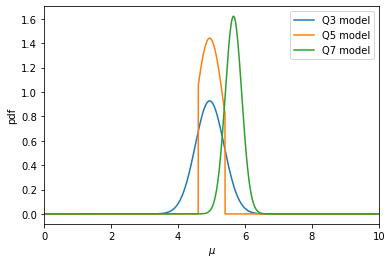

In [16]:
plt.plot(mugrid, post_normal, label='Q3 model')
plt.plot(mugrid, post_normal2, label='Q5 model')
plt.plot(mugrid, post_normal3, label='Q7 model')
plt.xlim(0,10)
plt.xlabel(r'$\mu$')
plt.ylabel('pdf')
plt.legend(loc='best');

8.

In [17]:
# prior for delta function - has size dx
# it can't be infinitessimal in python!
priord = np.ones(gs)/dx

# searching for bin the best-fit mean is in
# we want this index and the one to its left
# to produce our delta prior
bf_idx = np.searchsorted(mugrid, mu_bf)
priord[np.arange(gs) < bf_idx-1] = 0
priord[np.arange(gs) > bf_idx] = 0

# calculating posterior
posterior_delta = L*priord

# normalising posterior
post_aread = np.trapz(posterior_delta, mugrid, dx)

# calculating bayes factor
bayes_fact = post_area/post_aread
print(f'Bayes factor, Q3/Q7 = {bayes_fact:.5f}')
print(f'The ratio < 1, disfavouring the model in Q3. Delta prior is favoured')
print(f"This is because there is a large Occam's penalty for a wider prior "+
          "due to increased model complexity")

Bayes factor, Q3/Q7 = 0.13479
The ratio < 1, disfavouring the model in Q3. Delta prior is favoured
This is because there is a large Occam's penalty for a wider prior due to increased model complexity


SRT: Afraid not. The numerical answer isn't correct, and the method doesn't work I don't think. It's not a normalized prior. The correct approach is to remember that the integral of a function against a delta function is just the value of the function at the position of the delta function. So you just needed to evaluate the likelihood at the relevant location. -3

## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in the lecture. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [18]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

1.

In [19]:
# filepath to dataset
filepath = '../../homeworks/hw_data/hw4_data_2.npy'

# reading in dataset
data = np.load(filepath)
x, y, sigma_y = data

# setting y-intercept as y=-0.23
theta0 = -0.23

2.

In [20]:
# creating grid of x values
xgrid = np.linspace(0.5, 1.5, 100)
dx = xgrid[1]-xgrid[0]

# calculating log likely
logLikely = np.array([logL([theta0, theta1], data) for theta1 in xgrid])

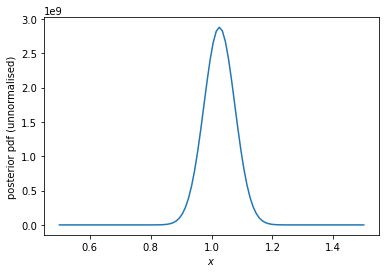

In [21]:
# prior already 1. Finding posterior
post = np.exp(logLikely)

plt.plot(xgrid, post)
plt.xlabel(r'$x$')
plt.ylabel('posterior pdf (unnormalised)');

3.

In [22]:
# calculating normalisation constant
evidence1d = np.trapz(post, xgrid, dx)
print(f'evidence = {evidence1d:.2e}')

evidence = 3.66e+08


4.

In [23]:
# creating grid of x values
x2grid = np.linspace(-1, 0.25, 100)

# calculating log likely
logLikely2 = np.array([[logL([theta0, theta1, theta2], data) 
                           for theta2 in x2grid] for theta1 in xgrid])

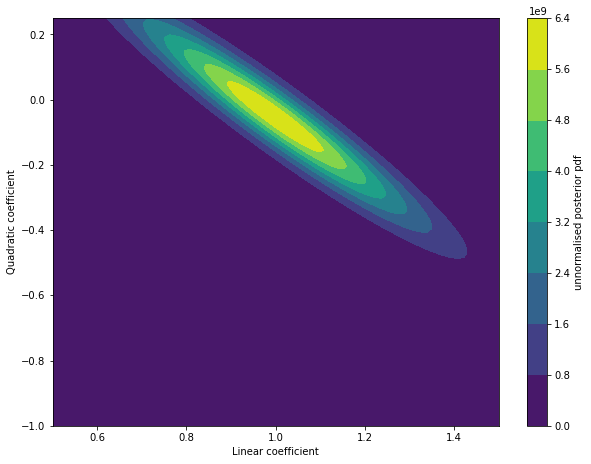

In [24]:
# Plot the results (using code from Lecture 9)
prior2d = 1/(1.25)
post2d = np.exp(logLikely2)*prior2d

fig = plt.figure(figsize=(10, 7.5))
con = plt.contourf(xgrid, x2grid, post2d)
plt.colorbar(con, label='unnormalised posterior pdf')
plt.xlabel('Linear coefficient')
plt.ylabel('Quadratic coefficient');

5.

In [25]:
# evidence is normalising constant
# integrate over 2d array
evidence2d = np.trapz(np.trapz(post2d, xgrid, dx), x2grid, x2grid[1]-x2grid[0])

print(f'Bayesian evidence for quadratic model = {evidence2d:.2e}')

Bayesian evidence for quadratic model = 4.90e+08


6.

In [26]:
print(f'Bayes factor, linear/quadratic = {evidence1d/evidence2d:.3f}')
print(f'Quadratic model favoured from Bayesian evidence')

Bayes factor, linear/quadratic = 0.746
Quadratic model favoured from Bayesian evidence


The Bayes factor is a ratio that compares how well two models averaged over all allowed values fit the data. For two models M1 and M2, model M1 is favoured is the ratio between M1 and M2 is greater than 1.

The BIC is easier to compute because it only requires the maximum likelihood of the model, rather than integrating the likelihood over all of parameter space. It also takes into account the number of parameters and the number of data points used in each model. The least complicated model is favoured. The best model has the smallest BIC.

SRT: All correct. But specifically, the model comparison for this analysis performed in the lecture found that the linear was favored. This is because the BIC penalized the quadratic coefficient too much. 